## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.outlier import z_score_outliers, iqr_outliers

## Configuations

In [2]:
# path of the dataset
data_path='C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/Storke Prediction/api/src/notebooks/data/stroke-data.csv'

# disable the limit for viewing all rows
pd.set_option('display.max_rows', None)
# disable the limit for viewing all columns
pd.set_option('display.max_columns', None)

## Exploratory Data analysis

In [3]:
# loading the dataset
df = pd.read_csv(data_path)

In [4]:
# view first 5 rows in the dataset 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# viewing the shape of the dataset
df.shape

(5110, 12)

In [6]:
# viewing the number of missing values in the dataset
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# checking the percentage of missing values
missing_values = df.isna().sum()
print('Percentage of missing values:')
print(missing_values[missing_values > 0] / len(df) * 100)

Percentage of missing values:
bmi    3.933464
dtype: float64


In [8]:
 # checking for duplicate rows
print('Duplicate rows: ', df.duplicated().sum())

Duplicate rows:  0


In [9]:
# viewing the features in the dataset
print(f'Features in the dataset: {df.columns}')

Features in the dataset: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [10]:
# checking the datatypes
print(f'Datatypes in the dataset: {df.dtypes.value_counts()}')

Datatypes in the dataset: object     5
int64      4
float64    3
Name: count, dtype: int64


### Insights after initial analysis:

- There are some missing values in the bmi feature
- There are no duplicate rows
- There are object (5), int64 (4), float64 (3)
- Here only bmi, age and avg_glucose_level are true numeric features, hypertension and hear_disease are categorical features which are already encoded.

In [11]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [12]:
# separating numeric and object features of further analysis
numeric_feats = ['bmi', 'age', 'avg_glucose_level']
categorical_feats = df.select_dtypes(include='object').columns.tolist()
categorical_feats.extend(['hypertension', 'heart_disease'])

In [13]:
# viewing the summary statistics of numeric features
df[numeric_feats].describe()

,bmi,age,avg_glucose_level
count,4909.000000,5110.000000,5110.000000
mean,28.893237,43.226614,106.147677
std,7.854067,22.612647,45.283560
min,10.300000,0.080000,55.120000
25%,23.500000,25.000000,77.245000
50%,28.100000,45.000000,91.885000
75%,33.100000,61.000000,114.090000
max,97.600000,82.000000,271.740000


In [14]:
# checking the skewness of numeric features
for feature in numeric_feats:
    print(f'Skewness of {feature}: {df[feature].skew()}')

Skewness of bmi: 1.0553402052962912
Skewness of age: -0.1370593225984694
Skewness of avg_glucose_level: 1.5722838665030459


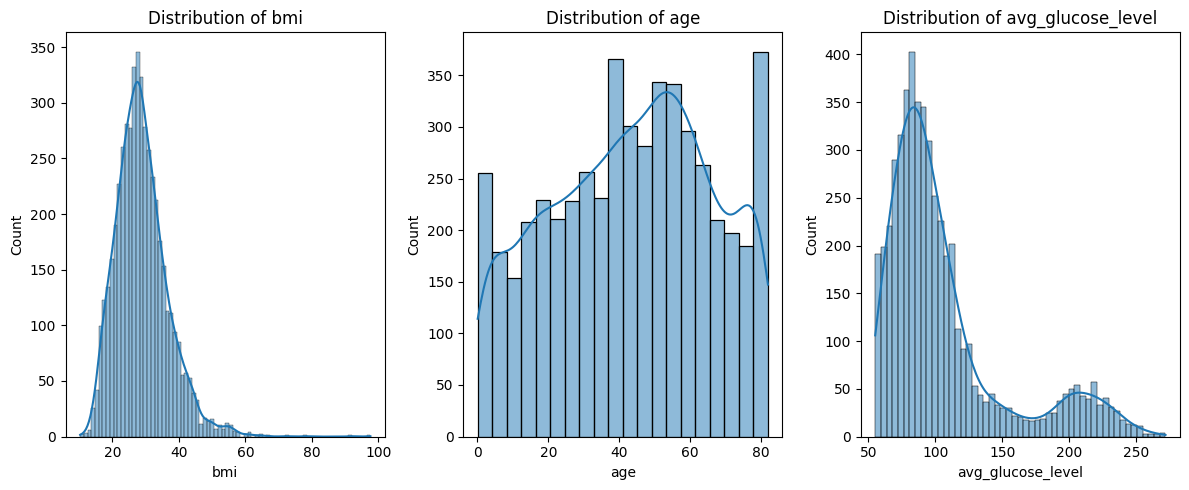

In [15]:
# viewing distribuiton of numeric features
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, feature in enumerate(numeric_feats):
    sns.histplot(df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

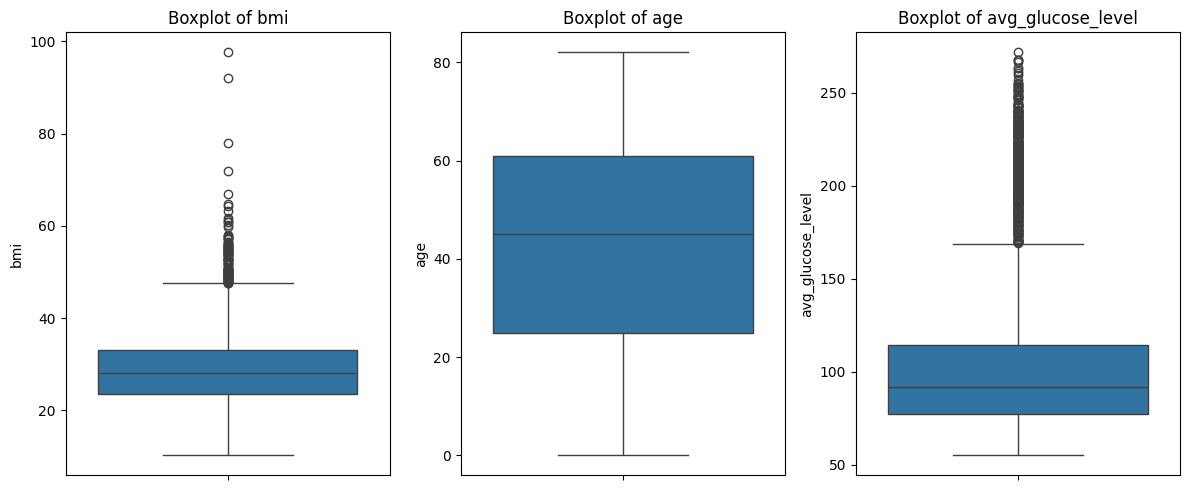

In [16]:
# checking for outliers using boxplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
for i, feature in enumerate(numeric_feats):
    sns.boxplot(df[feature], ax=ax[i])
    ax[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

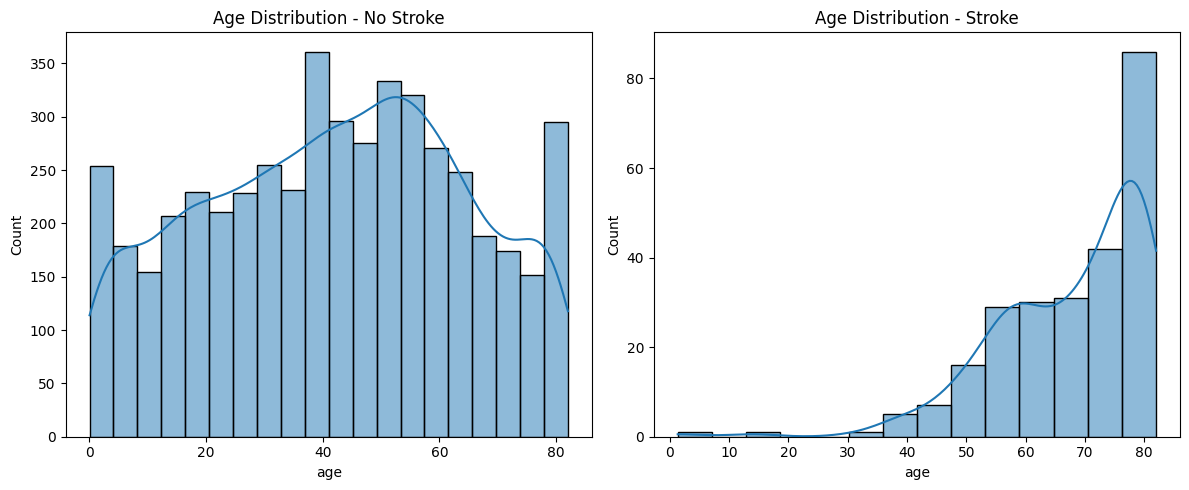

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['stroke'] == 0]['age'], kde=True, ax=ax[0])
sns.histplot(df[df['stroke'] == 1]['age'], kde=True, ax=ax[1])

ax[0].set_title('Age Distribution - No Stroke')
ax[1].set_title('Age Distribution - Stroke')

plt.tight_layout()
plt.show()

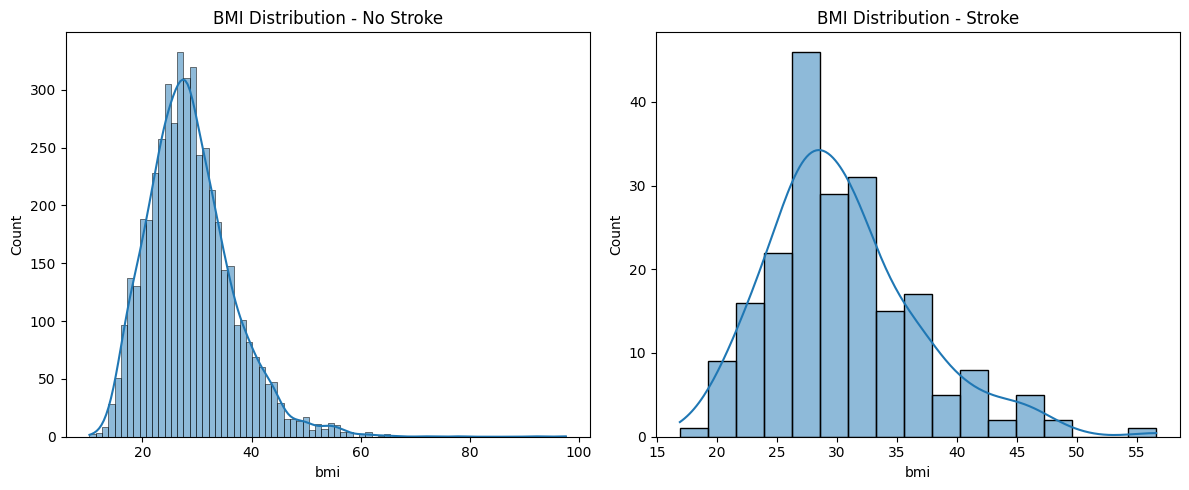

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['stroke'] == 0]['bmi'].dropna(), kde=True, ax=ax[0])
sns.histplot(df[df['stroke'] == 1]['bmi'].dropna(), kde=True, ax=ax[1])

ax[0].set_title('BMI Distribution - No Stroke')
ax[1].set_title('BMI Distribution - Stroke')

plt.tight_layout()
plt.show()

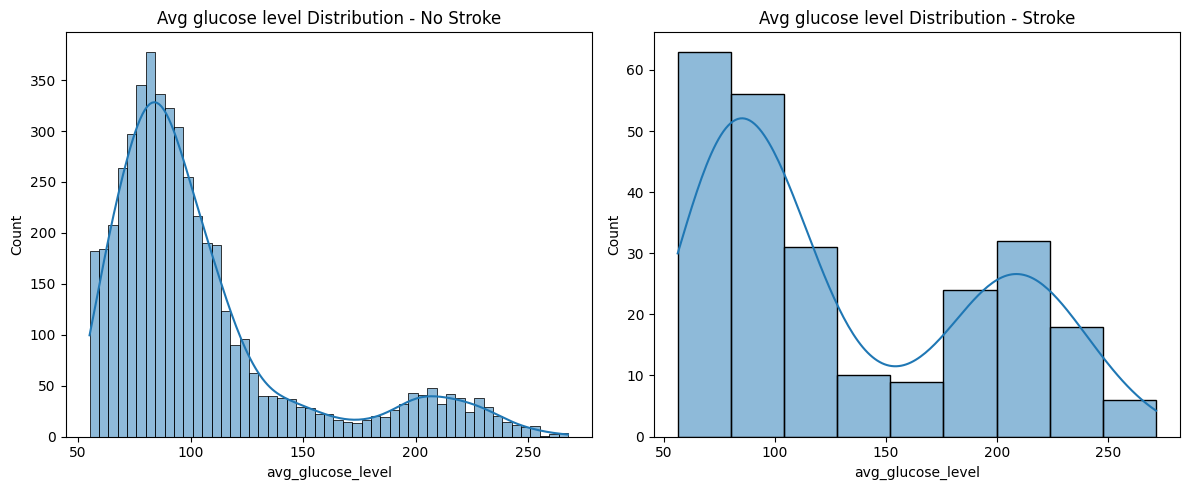

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['stroke'] == 0]['avg_glucose_level'], kde=True, ax=ax[0])
sns.histplot(df[df['stroke'] == 1]['avg_glucose_level'], kde=True, ax=ax[1])

ax[0].set_title('Avg glucose level Distribution - No Stroke')
ax[1].set_title('Avg glucose level Distribution - Stroke')

plt.tight_layout()
plt.show()

In [20]:
# separating normally distributed feature and not normally distributed feature
iqr_feats = ['bmi', 'avg_glucose_level']

In [21]:
# checking for outliers in age feature
z_score_outliers(df, 'age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [22]:
# checking for outliers in not normally distributed features
print('No. of utliers in skewed features:')
for feature in iqr_feats:
    print(f'{feature}: {len(iqr_outliers(df, feature))}')
print('='*50)
print('Percentage of outliers in skewed features:')
for feature in iqr_feats:
    print(f'{feature}: {len(iqr_outliers(df, feature)) / len(df[feature]) * 100}')

No. of utliers in skewed features:
bmi: 110
avg_glucose_level: 627
Percentage of outliers in skewed features:
bmi: 2.152641878669276
avg_glucose_level: 12.270058708414872


In [23]:
# outlier records in bmi feature
iqr_outliers(df, 'bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
333,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
341,Female,37.0,0,0,Yes,Private,Rural,75.18,48.2,formerly smoked,0
358,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
430,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
462,Female,44.0,0,0,No,Private,Rural,103.78,49.8,formerly smoked,0


In [24]:
# outlier records in avg_glucose_level feature
iqr_outliers(df, 'avg_glucose_level')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
14,Female,79.00,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
16,Male,64.00,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,Male,75.00,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1


### Insights:
- There is scaling issue present in the features
- The bmi and avg_glucose_level features are skewed
- They have outliers present (2.152% for bmi) and (12.270% for avg_glucose_level)

In [25]:
# checking the values in categorical features
print('='*30)
for feature in categorical_feats:
    print(df[feature].value_counts())
    print('='*30)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64


In [26]:
# checking the values in target feature
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

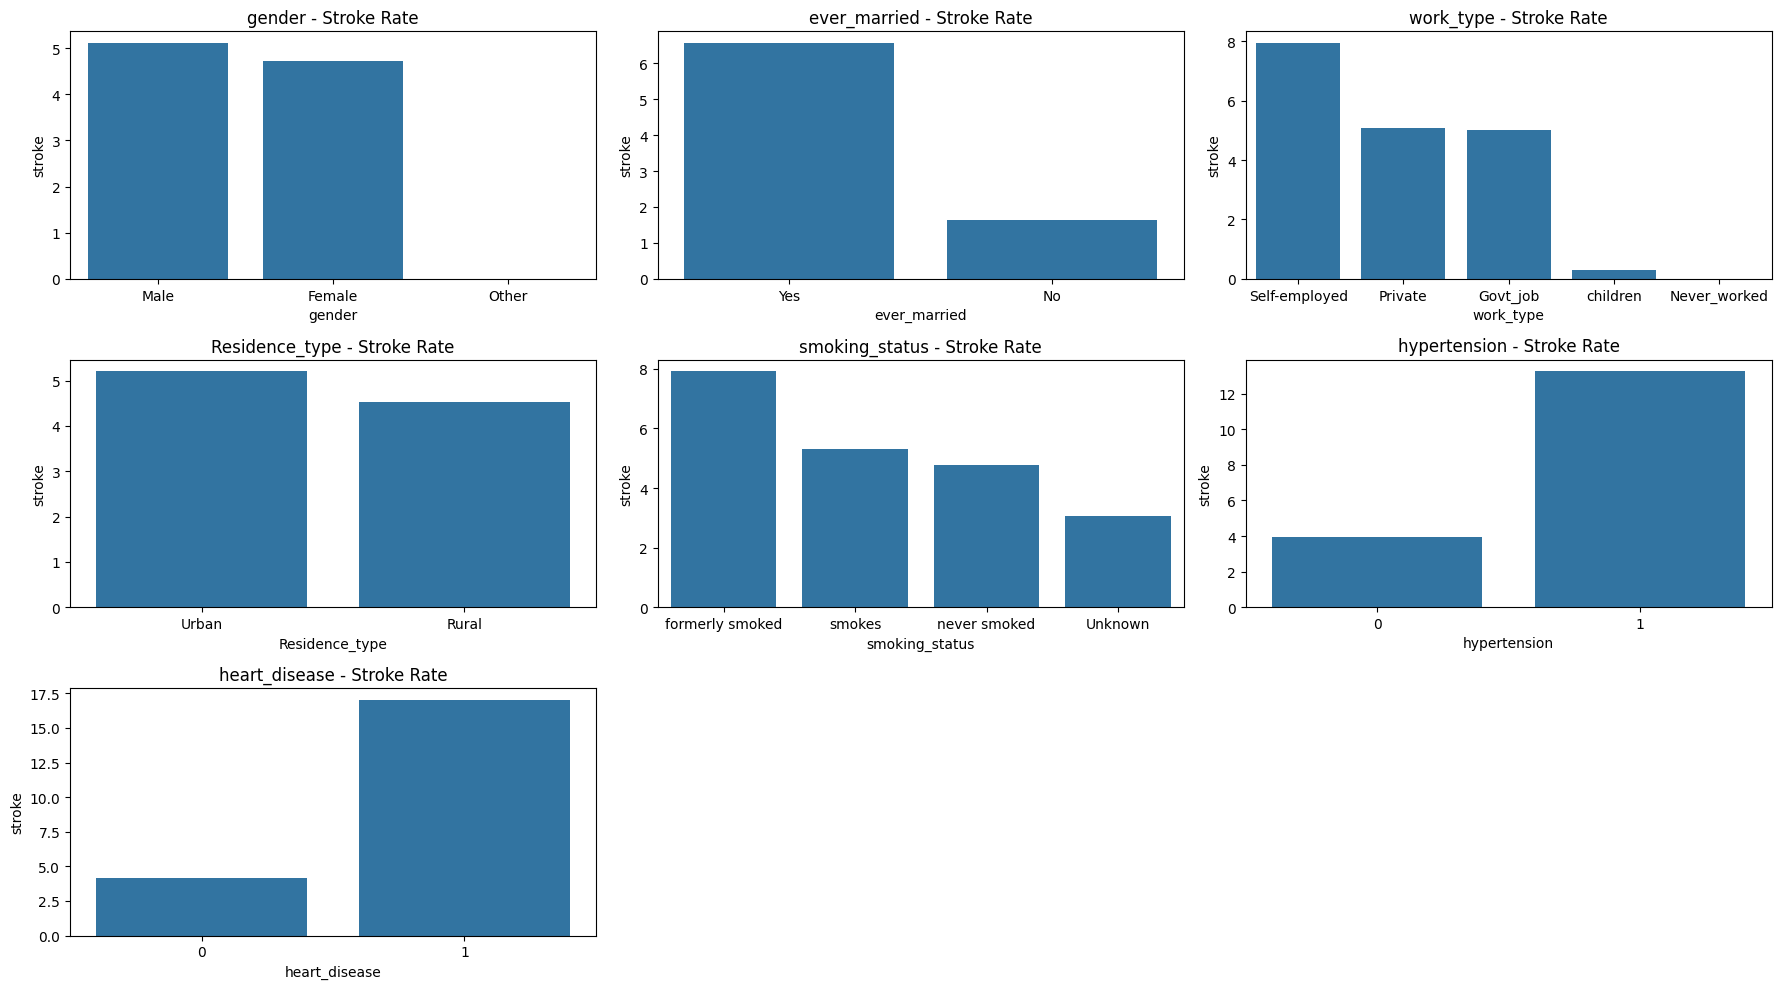

In [27]:
# plotting percentage of stroke with categorical features
fig, ax = plt.subplots(3, 3, figsize=(18, 10))
ax = ax.flatten()
for i, feature in enumerate(categorical_feats):
    sns.barplot((df.groupby(feature)['stroke'].mean().sort_values(ascending=False) * 100), ax=ax[i])
    ax[i].set_title(f'{feature} - Stroke Rate')

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

In [28]:
# viewing percentage of stroke with categorical features
print('='*30)
for feature in categorical_feats:
    print(df.groupby(feature)['stroke'].mean().sort_values(ascending=False) * 100)
    print('='*30)

gender
Male      5.106383
Female    4.709419
Other     0.000000
Name: stroke, dtype: float64
ever_married
Yes    6.561288
No     1.650541
Name: stroke, dtype: float64
work_type
Self-employed    7.936508
Private          5.094017
Govt_job         5.022831
children         0.291121
Never_worked     0.000000
Name: stroke, dtype: float64
Residence_type
Urban    5.200308
Rural    4.534606
Name: stroke, dtype: float64
smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64
hypertension
1    13.253012
0     3.967910
Name: stroke, dtype: float64
heart_disease
1    17.028986
0     4.178734
Name: stroke, dtype: float64


### Insights
- The data is highly imbalanced
- Males have higher chance of having a stroke than females
- Heart disease patients have the highest stroke risk (17.0%)
- Hypertension significantly increases stroke probability (13.3%)
- Married individuals higher chance of having a stroke than unmarried individuals
- Self-employed workers face the highest occupational stroke risk (7.9%)
- Former smokers have higher stroke risk than current smokers
- Urban residents have slightly higher stroke rates than rural residents